#Introduction
The goal of the analysis with this data is obvious. Classifying the binary dependent variable. There seems not to be other goal since the data is really difficult to understand(to whom doesn't have economical knowledge). I couldn't draw any insight as i didn't understand the bunch of variables. There was nothing I could do but modeling for prediction.

But we need to think about the goal of prediction. Let's suppose you want to invest in stocks. If you predicted a company to go bankrupt but it didn't , it doesn't matter because you didn't invest into the company. But in the opposite situation, it's huge problem. Therefore, forecasting bankruptcy is more important.

#Step's Required 

1.   Importing the Dataset.
2.   Basic Data Exploration.
3.   Feature Selection.
4.   Standarizing the Data.
5.   Model Building.
     *   Basics Machine Learning model.
     *   Deep learning using tensorflow and keras.
6.   Comparison of different model.







#Step 1:- Importing the Dataset

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from imblearn.over_sampling import SMOTE, RandomOverSampler

from scipy import stats
from sklearn.metrics import f1_score, confusion_matrix, classification_report, recall_score, precision_score, plot_precision_recall_curve
from sklearn.model_selection import learning_curve

# Ml model
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data =pd.read_csv("/content/data.csv")

In [3]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,1.256969e-04,0.0,0.458143,0.000725,0.0,0.147950,0.147950,0.147950,0.169141,0.311664,0.017560,0.095921,0.138736,0.022102,0.848195,0.688979,0.688979,0.217535,4.980000e+09,0.000327,0.263100,0.363725,0.002259,0.001208,0.629951,0.021266,0.207576,0.792424,0.005024,...,0.190643,0.004094,0.001997,1.473360e-04,0.147308,0.334015,0.276920,0.001036,0.676269,0.721275,0.339077,0.025592,0.903225,0.002022,0.064856,7.010000e+08,6.550000e+09,0.593831,4.580000e+08,0.671568,0.424206,0.676269,0.339077,0.126549,0.637555,0.458609,0.520382,0.312905,0.118250,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,2.897851e-04,0.0,0.461867,0.000647,0.0,0.182251,0.182251,0.182251,0.208944,0.318137,0.021144,0.093722,0.169918,0.022080,0.848088,0.689693,0.689702,0.217620,6.110000e+09,0.000443,0.264516,0.376709,0.006016,0.004039,0.635172,0.012502,0.171176,0.828824,0.005059,...,0.182419,0.014948,0.004136,1.383910e-03,0.056963,0.341106,0.289642,0.005210,0.308589,0.731975,0.329740,0.023947,0.931065,0.002226,0.025516,1.065198e-04,7.700000e+09,0.593916,2.490000e+09,0.671570,0.468828,0.308589,0.329740,0.120916,0.641100,0.459001,0.567101,0.314163,0.047775,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,2.361297e-04,25500000.0,0.458521,0.000790,0.0,0.177911,0.177911,0.193713,0.180581,0.307102,0.005944,0.092338,0.142803,0.022760,0.848094,0.689463,0.689470,0.217601,7.280000e+09,0.000396,0.264184,0.368913,0.011543,0.005348,0.629631,0.021248,0.207516,0.792484,0.005100,..

In [4]:
data.shape

(6819, 96)

In [5]:
columns=pd.DataFrame({'Columns':data.columns})
columns.head(50)

,Columns
0,Bankrupt?
1,ROA(C) before interest and depreciation befor...
2,ROA(A) before interest and % after tax
3,ROA(B) before interest and depreciation after...
4,Operating Gross Margin
5,Realized Sales Gross Margin
6,Operating Profit Rate
7,Pre-tax net Interest Rate
8,After-tax net Interest Rate
9,Non-industry income and expenditure/revenue


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [7]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),...,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,...,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6.819000e+03,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,0.781381,1.995347e+09,1.950427e+09,0.467431,1.644801e+07,0.115001,0.190661,0.190633,0.190672,0.228813,0.323482,1.328641e+06,0.109091,0.184361,0.022408,0.847980,0.689146,0.689150,0.217639,5.508097e+09,1.566212e+06,0.264248,0.379677,4.032850e+05,8.376595e+06,0.630991,4.416337e+06,0.113177,0.886823,0.008783,...,0.522273,0.124095,3.592902e+06,3.715999e+07,0.090673,0.353828,0.277395,5.580680e+07,0.761599,0.735817,0.331410,5.416004e+07,0.934733,0.002549,0.029184,1.195856e+09,2.163735e+09,0.594006,2.471977e+09,0.671531,1.220121e+06,0.761599,0.331410,0.115645,0.649731,0.461849,0.593415,0.315582,0.031506,0.001173,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686

#Step 2 :- Data Exploration

---



In [8]:
# prettier graphs!
plt.style.use('ggplot')

Text(0.5, 0, 'Target')

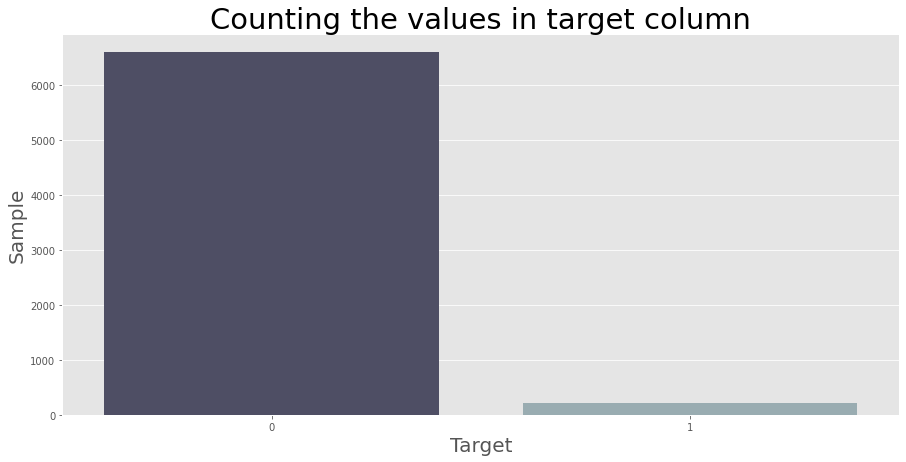

In [9]:
target_counts=data['Bankrupt?'].value_counts()
plt.figure(figsize=(15,7))
sns.barplot(y=target_counts,x=target_counts.index,palette='bone')
plt.title("Counting the values in target column",fontsize=29)
plt.ylabel('Sample',fontsize=20)
plt.xlabel('Target',fontsize=20)

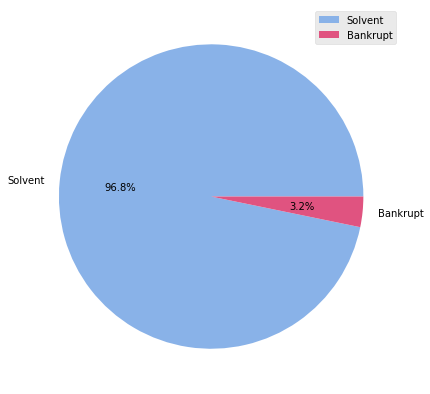

In [10]:
my_labels=['Solvent','Bankrupt']
my_color=['#89b2e8','#e05380']
plt.figure(figsize=(15,7))
plt.pie(data['Bankrupt?'].value_counts(),colors=my_color,labels=my_labels,autopct='%1.1f%%')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Correlation')

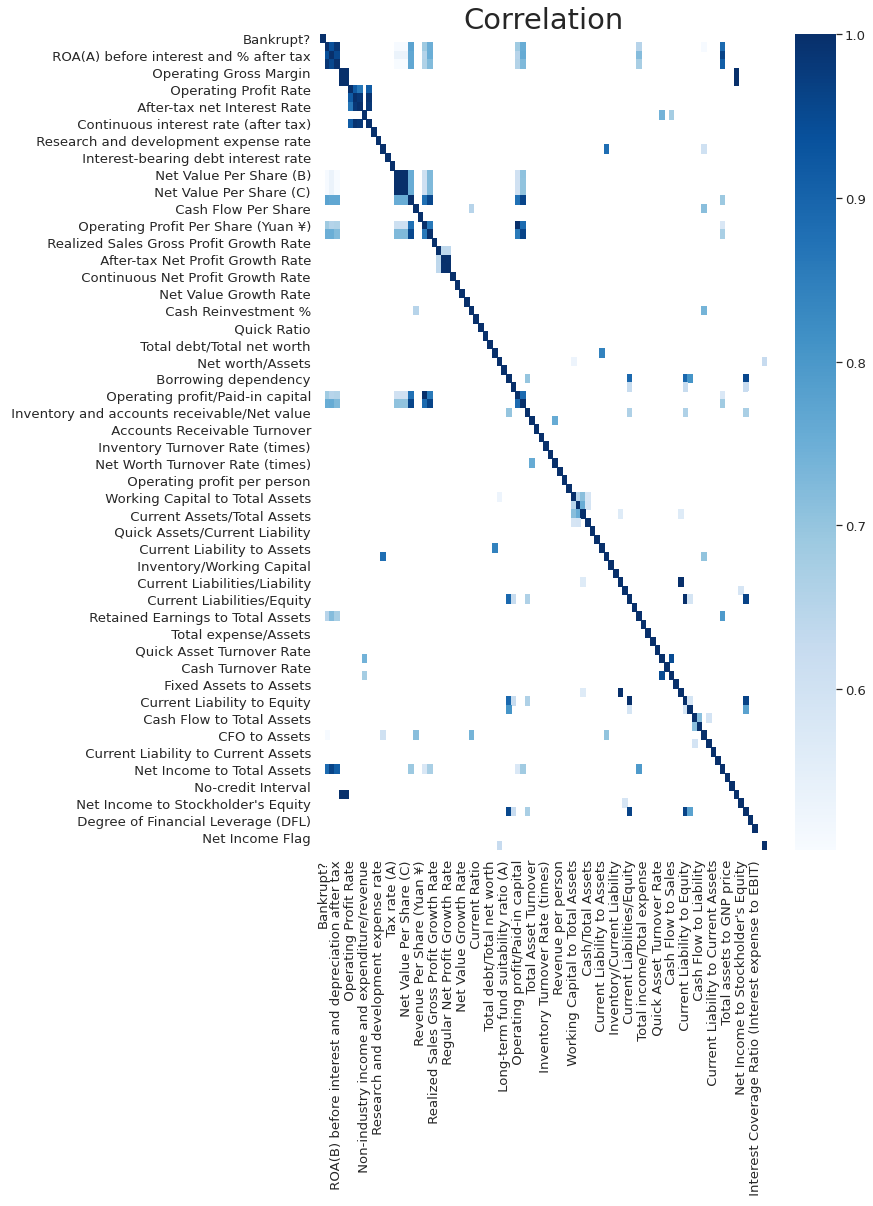

In [11]:
# correlation above 0.50

correlation_five = data.corr()
correlation_five = correlation_five[correlation_five >0.50]

plt.figure(figsize=(10,15))
sns.set_style('white')
sns.set_context(context='notebook',font_scale=1.2)
sns.heatmap(correlation_five,cmap="Blues");
plt.title('Correlation',fontsize=29)

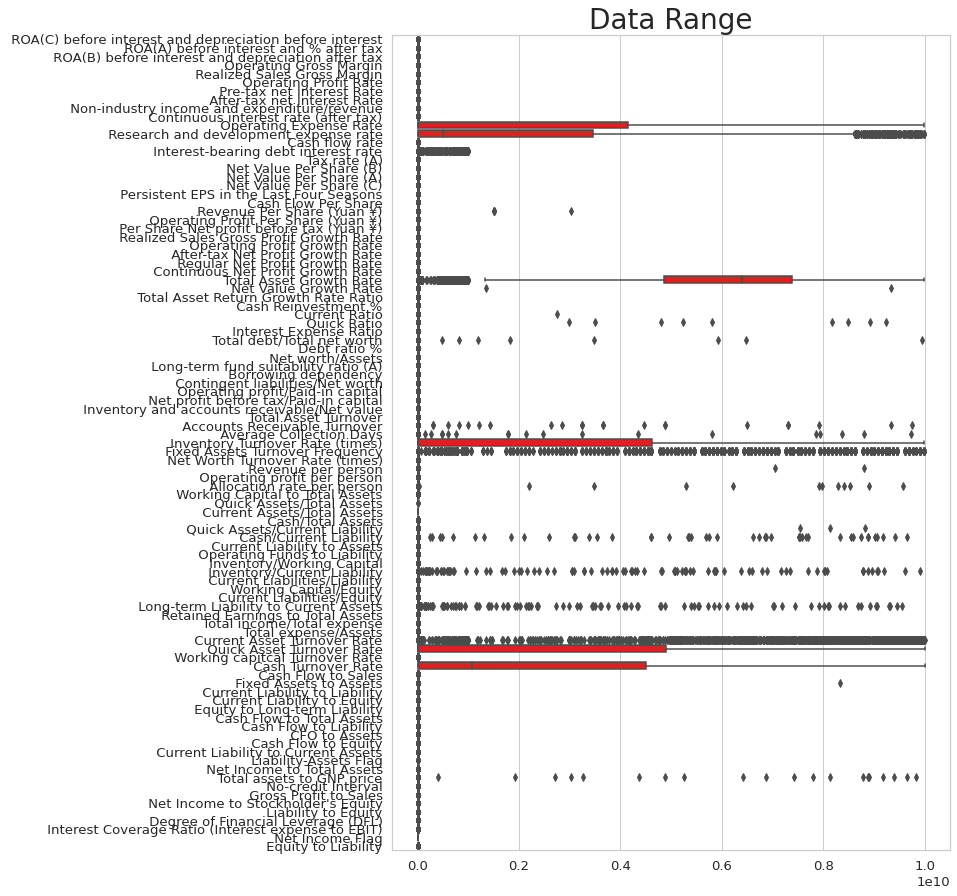

In [12]:
plt.figure(figsize=(10,15))
sns.set_style('whitegrid')
sns.set_palette('bwr')
sns.boxplot(data = data.drop(['Bankrupt?'], axis=1), orient='h', color='red')
plt.title('Data Range',fontsize=28)
plt.show()

#Step:3 :- Feature Selection
Model based feature selection uses a supervised machine learning model to judge the importance of each feature, and keeps only the most important ones. For this case, we are going to use a random forest classifier, since it usually yields good results and because this is a classification task

---



In [13]:
# training set
X = data.iloc[:,1:].values
y = data.iloc[:,0].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
X_train.shape,y_train.shape

((5114, 95), (5114, 1))

In [ ]:
'''# Learn RandomForestClassifier using GridSearchCV
clf_rf = RandomForestClassifier(criterion='entropy', random_state=0)
parametrs = {'n_estimators': range(10, 30, 10),
             'max_depth': range(1, 12, 2),
             'min_samples_leaf': range(1, 7),
             'min_samples_split': range(2, 11, 2)}
grid_search_cv_clf = GridSearchCV(clf_rf, parametrs, cv=3, n_jobs=-1)
grid_search_cv_clf.fit(X_train, y_train)
grid_search_cv_clf.best_params_

best_clf = grid_search_cv_clf.best_estimator_

feature_importances_df = pd.DataFrame({'features':list(X_train.columns), 
                                       'feature_importances':  best_clf.feature_importances_})\
                        .sort_values(by='feature_importances')

feature_importances_df.plot.pie(
                        explode=[0.1]*len(X_train.columns),
                        labels = feature_importances_df.features,
                        y = 'feature_importances',
                        autopct='%1.1f%%',
                        shadow=True,
                        legend=False,
                        figsize=(10, 10));'''

Optimal number of features : 32


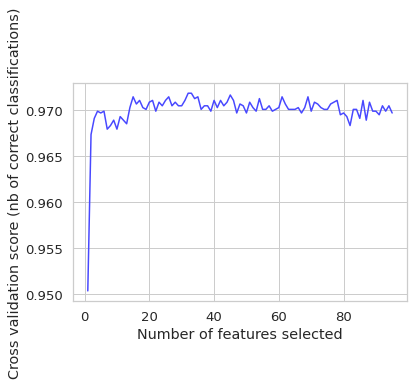

In [15]:
# Set RandomForestClassifier as estimator for RFECV
cart = RandomForestClassifier(random_state=42)
# Minimum number of features to consider
min_features_to_select = 1  
# Set number of folds
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1) 
# Set cross-validation process
rfecv = RFECV(estimator=cart, step=1, cv=cv,
              scoring='accuracy',
              min_features_to_select=min_features_to_select, n_jobs=1)
# Fit the model
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()

In [30]:
# Display features' names
most_relevent_cols = data.iloc[:, 1:].columns[np.where(rfecv.support_ == True)]
print("Most relevant features are: ")
print(most_relevent_cols)


Most relevant features are: 
Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' Non-industry income and expenditure/revenue',
       ' Interest-bearing debt interest rate', ' Net Value Per Share (B)',
       ' Net Value Per Share (A)', ' Net Value Per Share (C)',
       ' Persistent EPS in the Last Four Seasons',
       ' Per Share Net profit before tax (Yuan ¥)', ' Net Value Growth Rate',
       ' Total Asset Return Growth Rate Ratio', ' Quick Ratio',
       ' Interest Expense Ratio', ' Total debt/Total net worth',
       ' Net worth/Assets', ' Borrowing dependency',
       ' Net profit before tax/Paid-in capital',
       ' Accounts Receivable Turnover', ' Inventory Turnover Rate (times)',
       ' Fixed Assets Turnover Frequency', ' Allocation rate per person',
       ' Cash/Total Assets', ' Cash/Current Liability',
       ' Inventory/Working Capital', ' Working Capital/Equity',
       ' Net Income to Total As

In [31]:
# Append target
most_relevent_cols = list(most_relevent_cols)
most_relevent_cols.append("Bankrupt?")

In [33]:
# Display df
rfecv_df = data[most_relevent_cols]
rfecv_df.head()

,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,Non-industry income and expenditure/revenue,Interest-bearing debt interest rate,Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Net worth/Assets,Borrowing dependency,Net profit before tax/Paid-in capital,Accounts Receivable Turnover,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Allocation rate per person,Cash/Total Assets,Cash/Current Liability,Inventory/Working Capital,Working Capital/Equity,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Net Income to Stockholder's Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability,Bankrupt?
0,0.370594,0.424389,0.302646,0.000725,0.147950,0.147950,0.147950,0.169141,0.138736,0.000327,0.263100,0.001208,0.629951,0.021266,0.792424,0.390284,0.137757,0.001814,1.820926e-04,1.165007e-04,0.037135,0.004094,1.473360e-04,0.276920,0.721275,0.716845,0.009219,0.622879,0.827890,0.026601,0.564050,0.016469,1
1,0.464291,0.538214,0.303556,0.000647,0.182251,0.182251,0.182251,0.208944,0.169918,0.000443,0.264516,0.004039,0.635172,0.012502,0.828824,0.376760,0.168962,0.001286,9.360000e+09,7.190000e+08,0.012335,0.014948,1.383910e-03,0.289642,0.731975,0.795297,0.008323,0.623652,0.839969,0.264577,0.570175,0.020794,1
2,0.426071,0.499019,0.302035,0.000790,0.177911,0.177911,0.193713,0.180581,0.142803,0.000396,0.264184,0.005348,0.629631,0.021248,0.792484,0.379093,0.148036,0.001495,6.500000e+07,2.650000e+09,0.141016,0.000991,5.340000e+09,0.277456,0.742729,0.774670,0.040003,0.623841,0.836774,0.026555,0.563706,0.016474,1
3,0.399844,0.451265,0.303350,0.000449,0.154187,0.154187,0.154187,0.193722,0.148603,0.000382,0.263371,0.002896,0.630228,0.009572,0.848535,0.379743,0.147561,0.001966,7.130000e+09,9.150000e+09,0.021320,0.018851,1.010646e-03,0.276580,0.729825,0.739555,0.003252,0.622929,0.834697,0.026697,0.564663,0.023982,1
4,0.465022,0.538432,0.303475,0.000686,0.167502,0.167502,0.167502,0.212537,0.168412,0.000439,0.265218,0.003727,0.636055,0.005150,0.893491,0.375025,0.167461,0.001449,1.633674e-04,2.935211e-04,0.023988,0.014161,6.804636e-04,0.287913,0.732000,0.795016,0.003878,0.623521,0.839973,0.024752,0.575617,0.035490,1


In [35]:
rfecv_df.shape

(6819, 33)

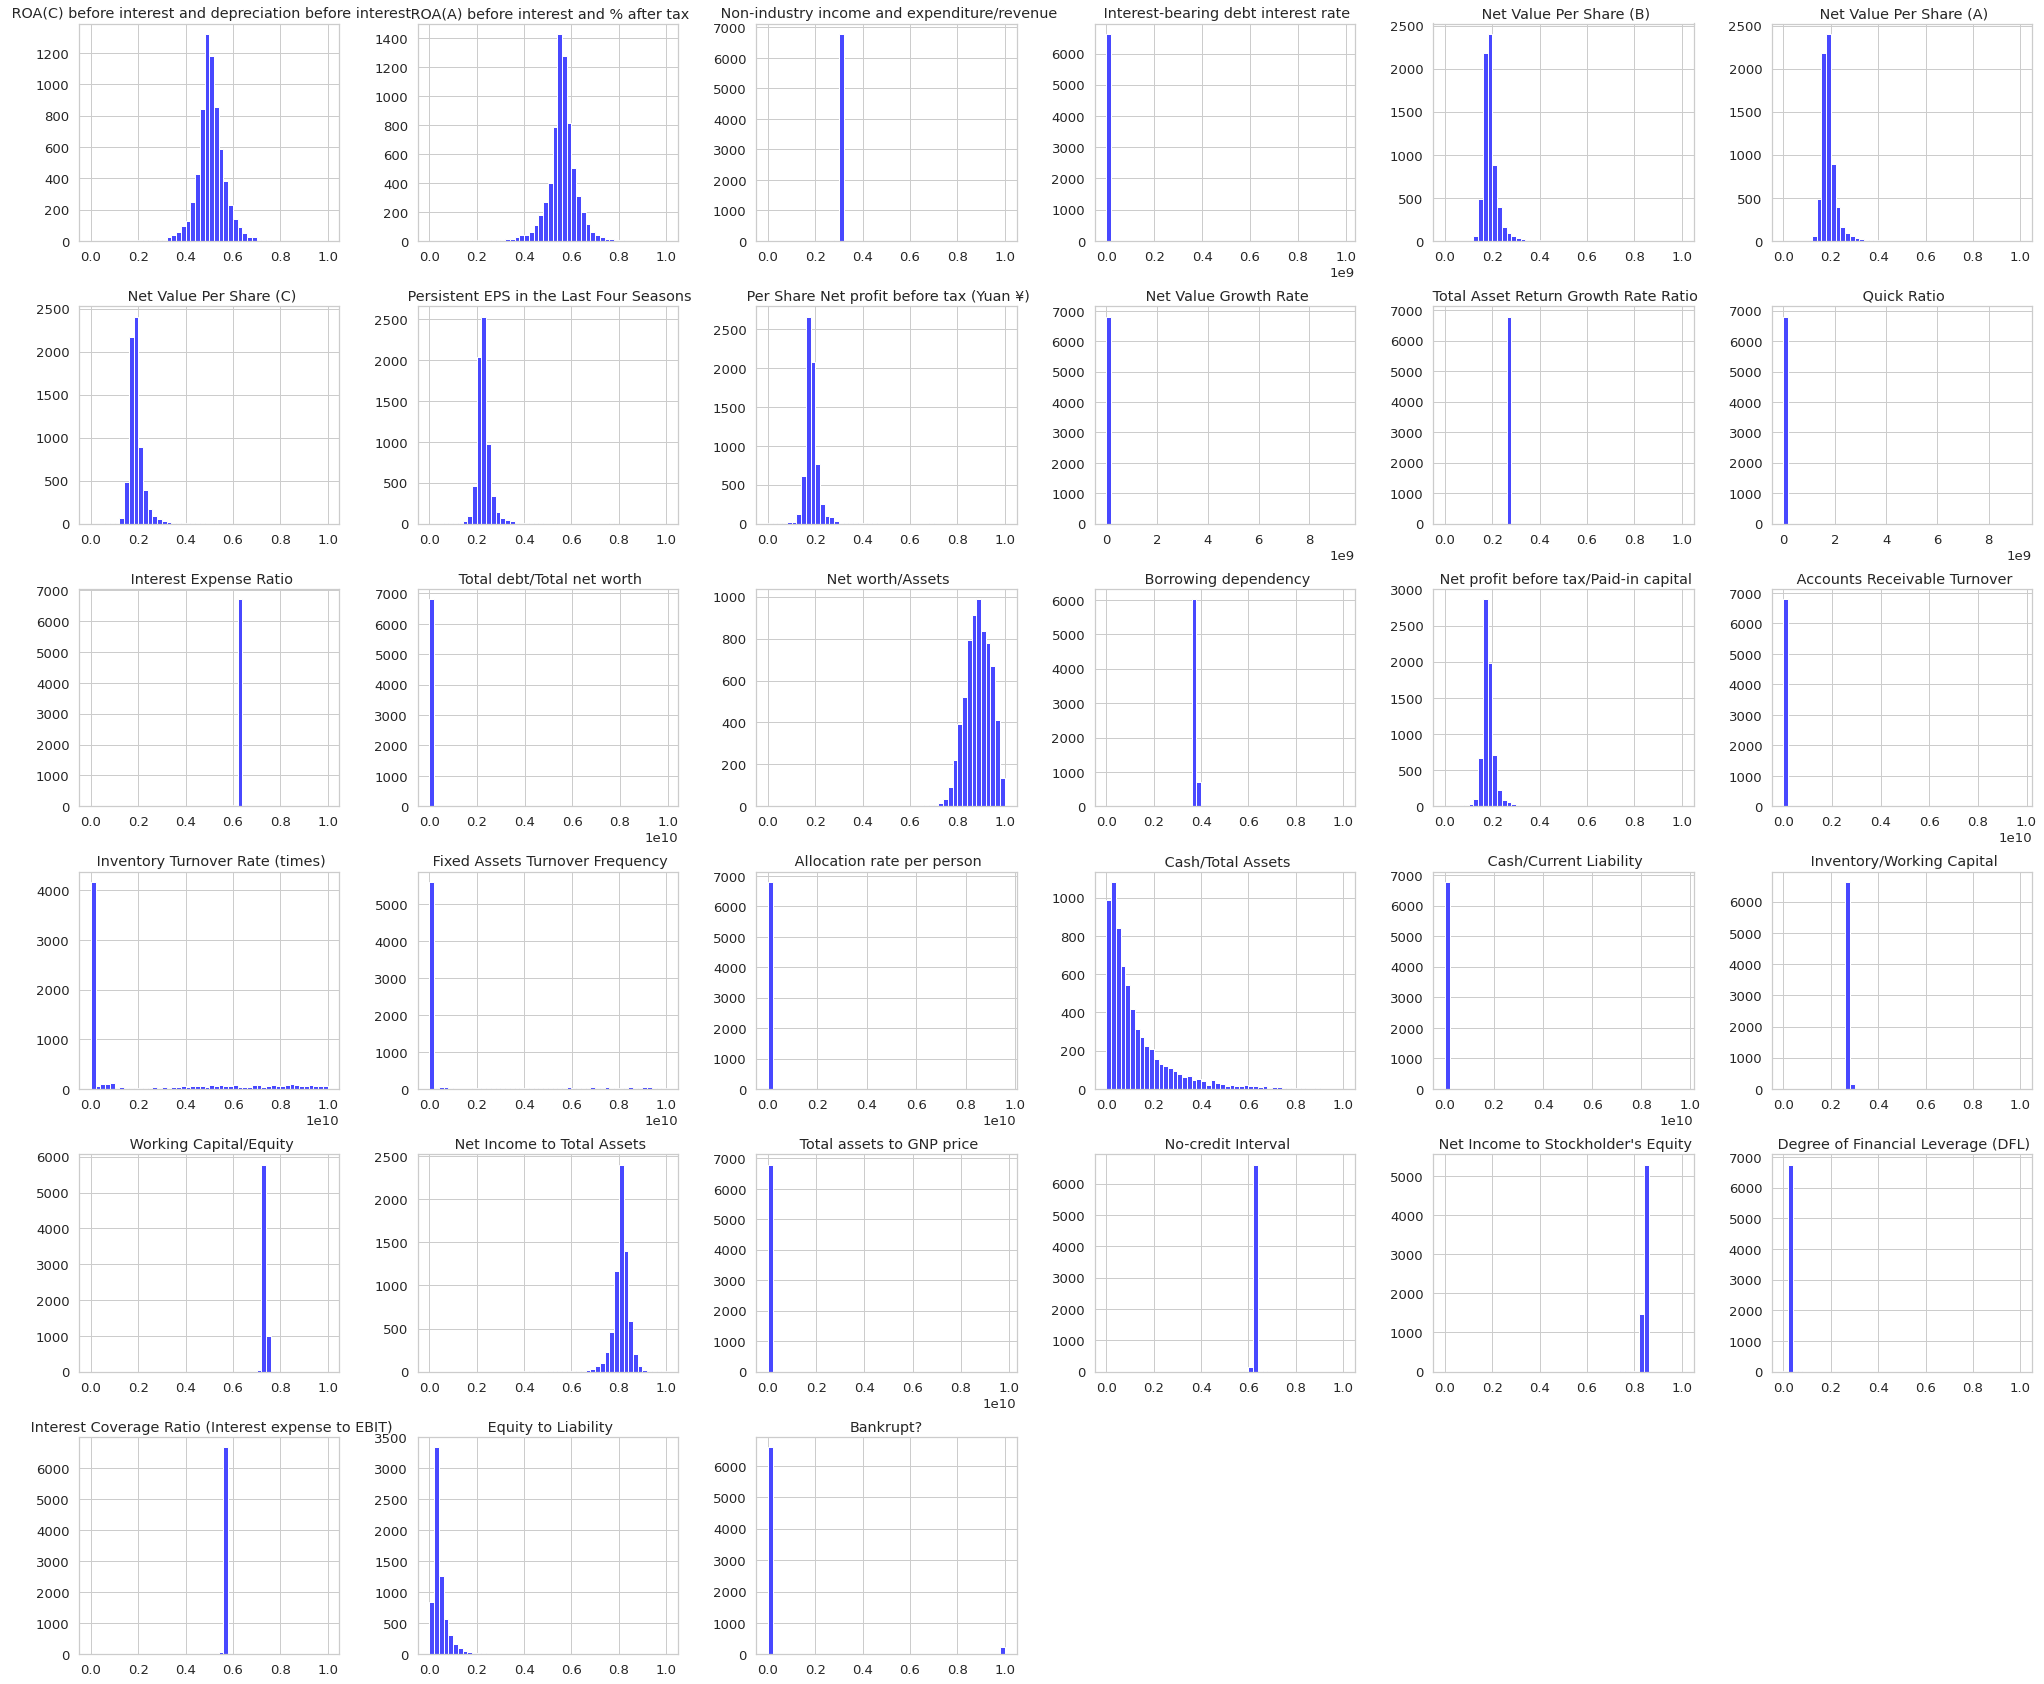

In [36]:
# Looking at the histograms of numerical data
rfecv_df.hist(figsize = (35,30), bins = 50)
plt.show()

#Correlation Plot:-

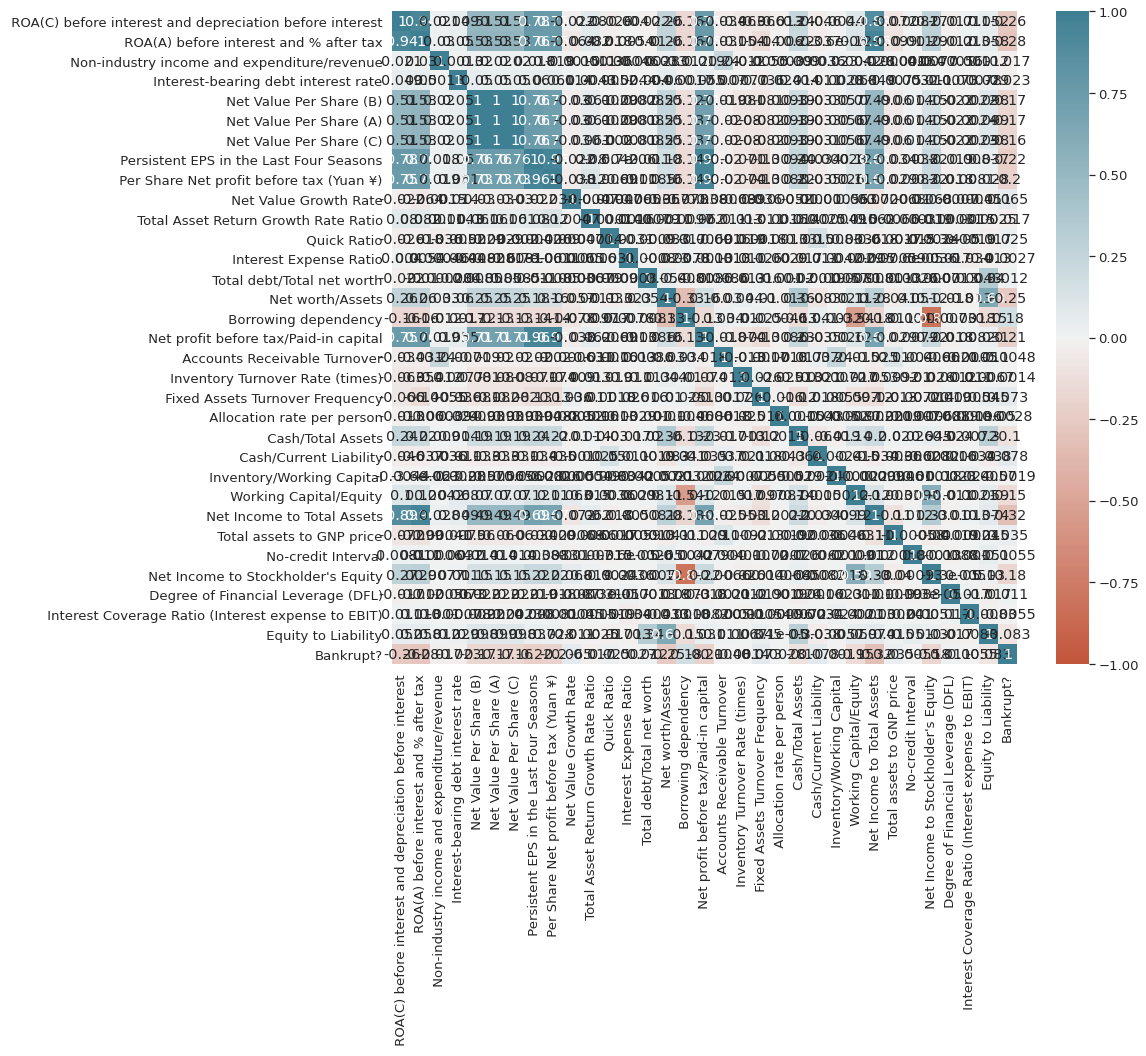

In [52]:
fig, ax = plt.subplots(figsize=(14,12))

sns.heatmap(rfecv_df.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), annot=True)

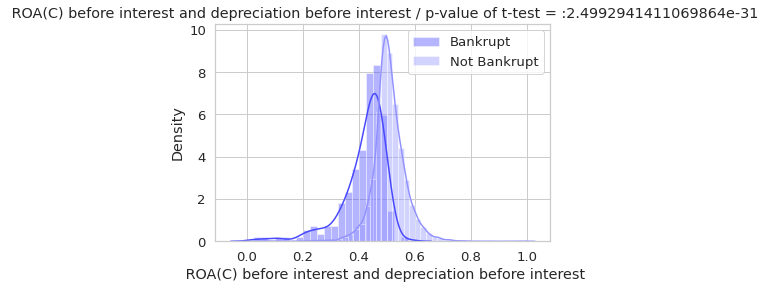

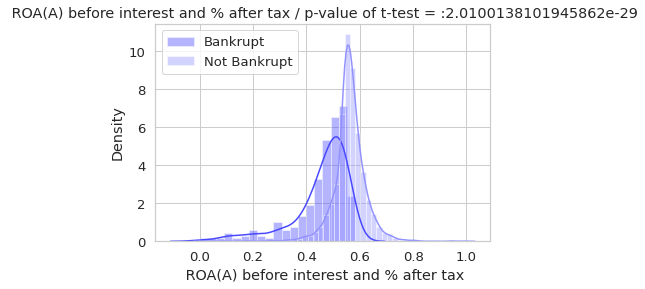

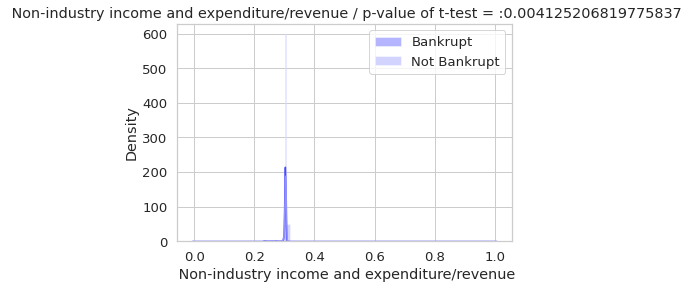

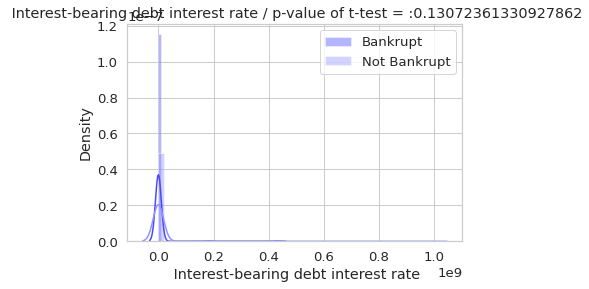

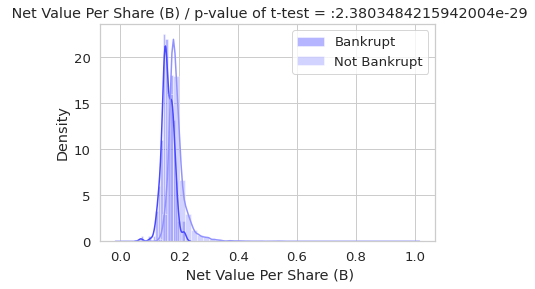

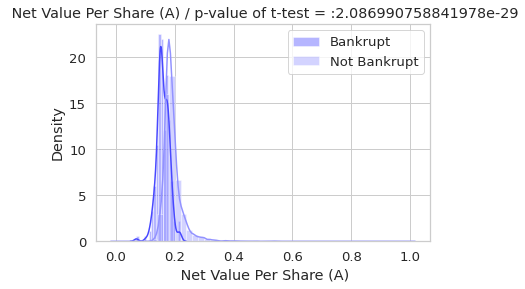

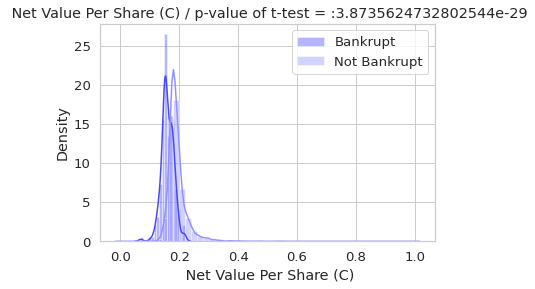

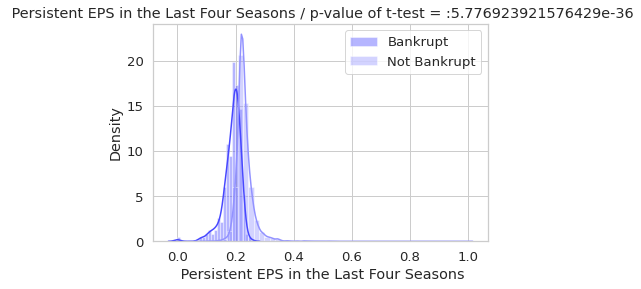

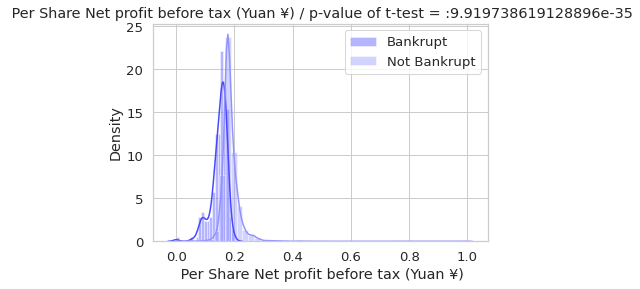

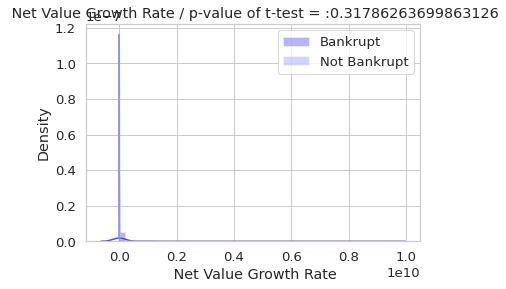

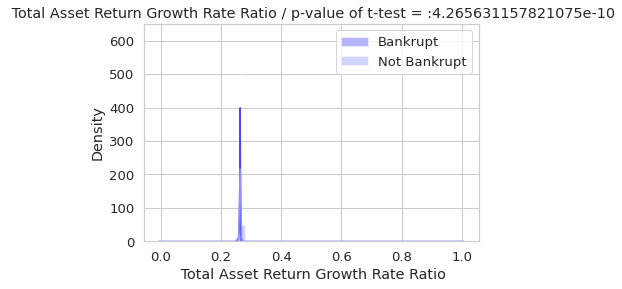

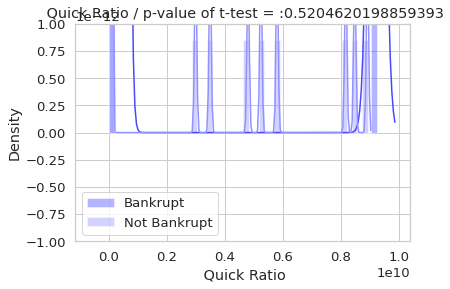

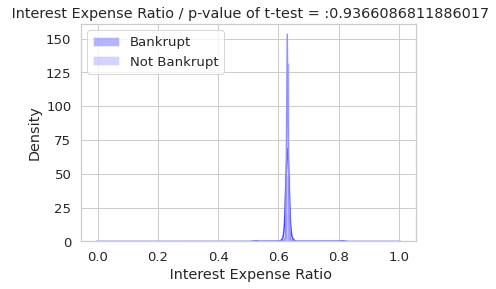

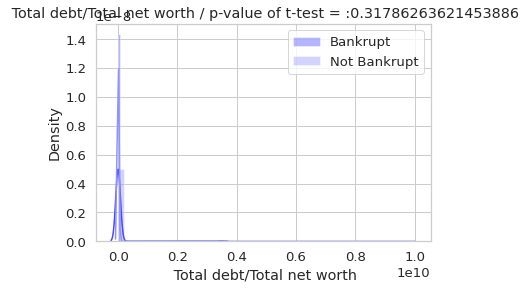

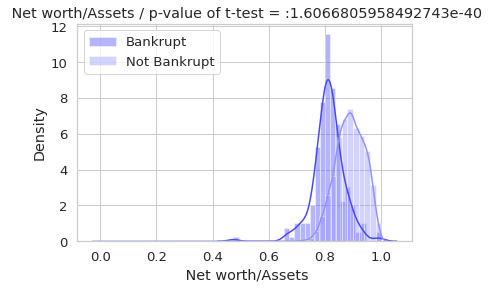

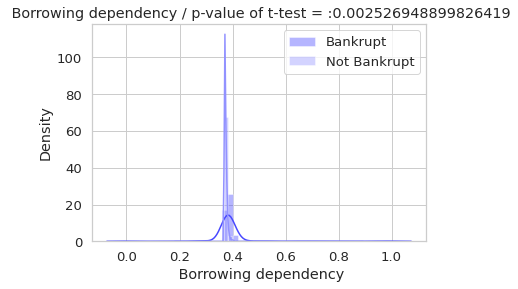

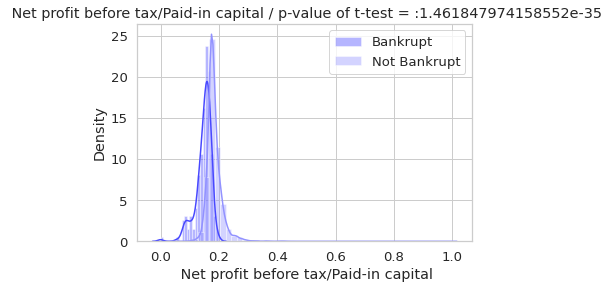

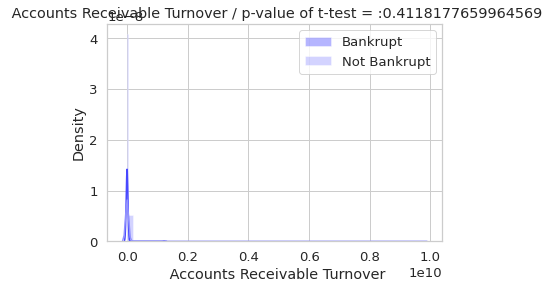

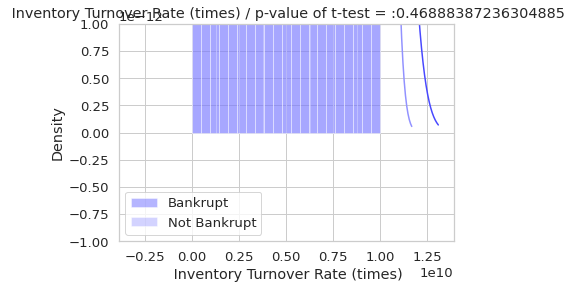

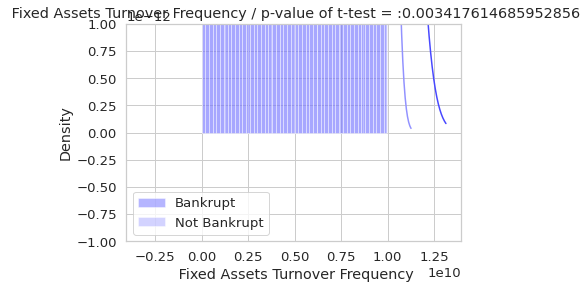

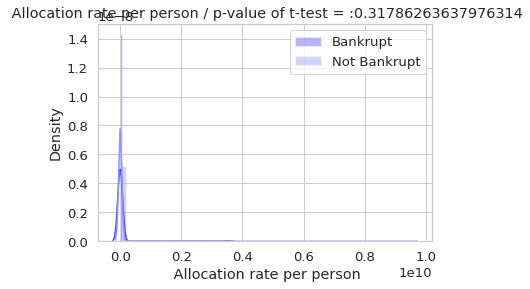

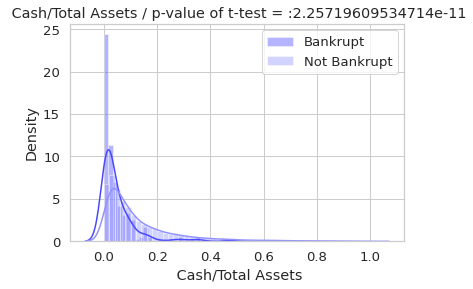

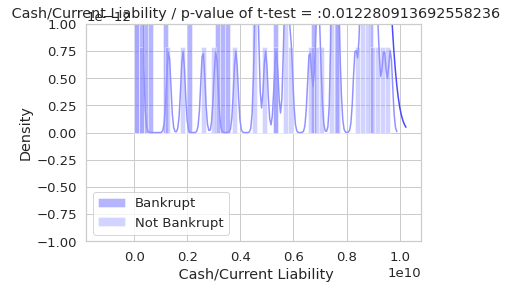

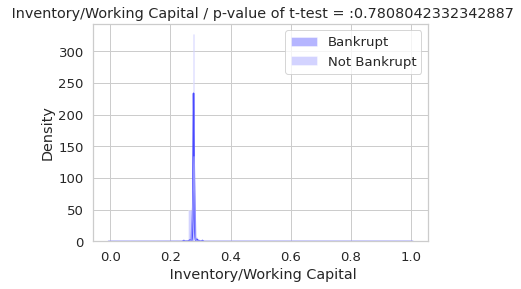

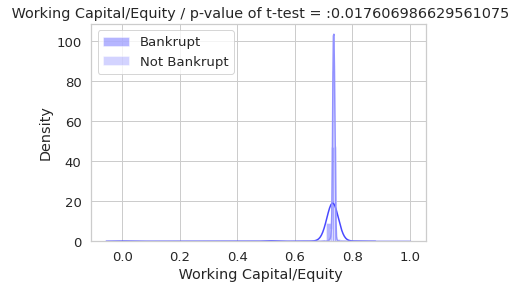

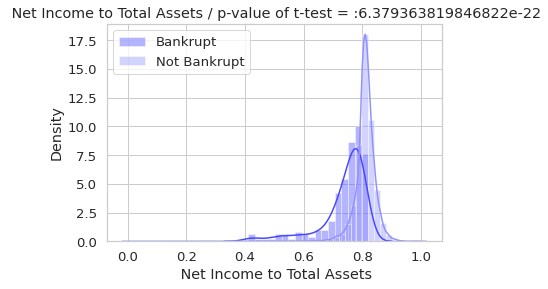

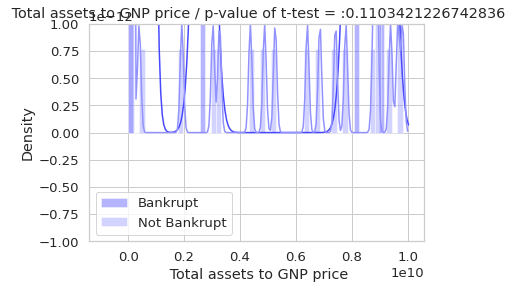

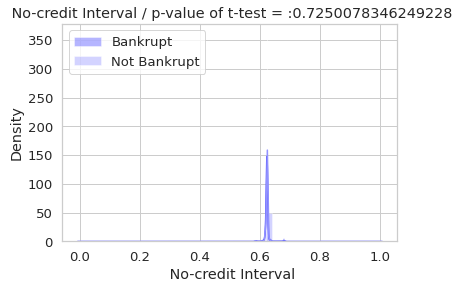

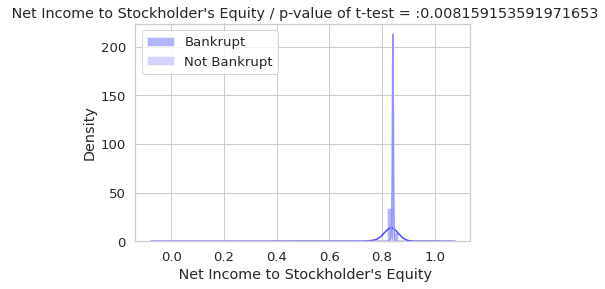

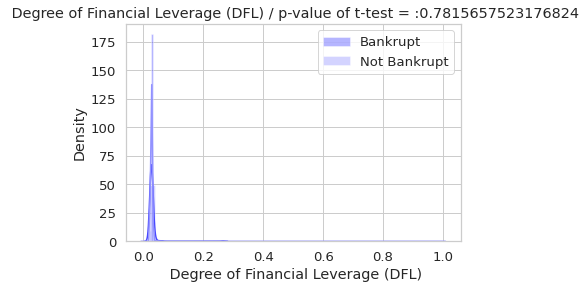

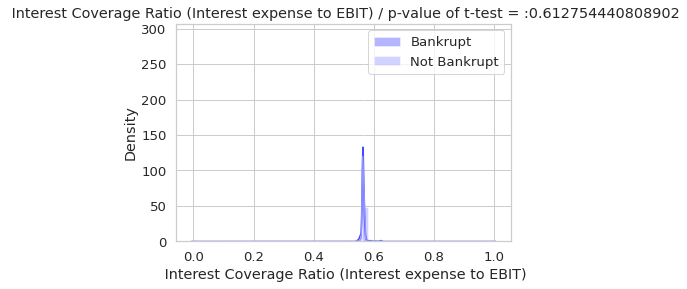

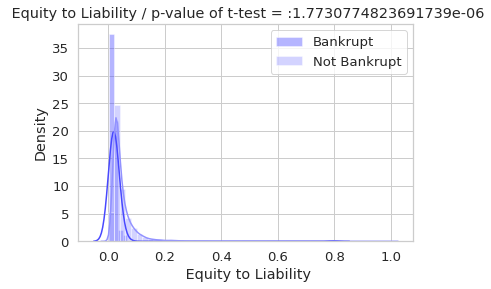

In [55]:
# Seperate dfs
bankrupt_df = rfecv_df[rfecv_df['Bankrupt?']==True]
not_bankrupt_df = rfecv_df[rfecv_df['Bankrupt?']==False]

# Analyze distributions of selected features using rfecv
cols = rfecv_df.drop("Bankrupt?", axis=1).columns

for feature in cols:
  a = bankrupt_df[feature]
  b = not_bankrupt_df[feature]
  b = b.sample(n=len(a), random_state=42) # Take random sample from each feature to match length of target
  # Running t-tests
  test = stats.ttest_ind(a,b)   
  plt.figure() 
  sns.distplot(bankrupt_df[feature], kde=True, label="Bankrupt")
  sns.distplot(not_bankrupt_df[feature], kde=True, label="Not Bankrupt") 
  plt.title("{} / p-value of t-test = :{}".format(feature, test[1]))
  plt.legend()

#Outlier Detection

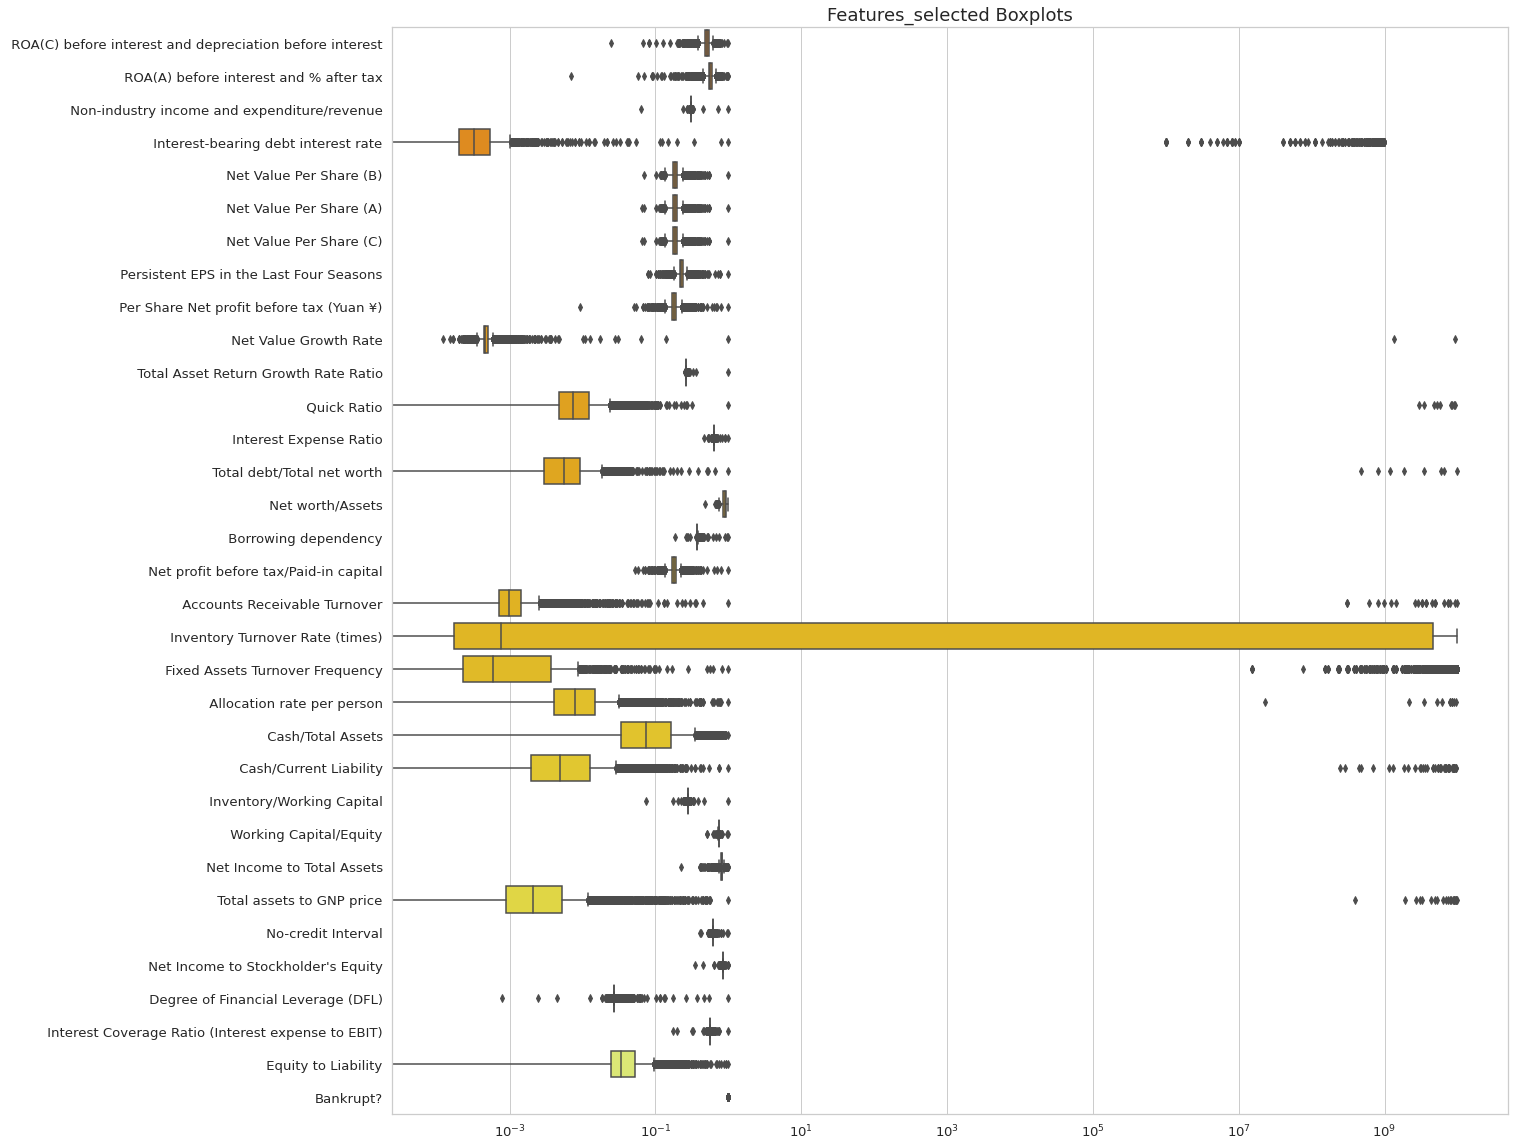

In [58]:
# Visulize outliers using boxplots
plt.figure(figsize = (20,20))
ax =sns.boxplot(data= rfecv_df, orient="h",palette='Wistia_r')
ax.set_title('Features_selected Boxplots', fontsize = 18)
ax.set(xscale="log")
plt.show()

#Model Building
Since this is a binary classification problem, we are more interested by predicting the positive value namely the Bankrupt category = 1. The positive category is our minority class and this will pose a real challenge for machine learning models. The best way to measure the performance of our models in this case is by computing the f1 score which is the average of our recall and precision. Recall or also called sensitivity is the metric that gives us true positive rate which is the correctly classified positives out of all possible positives, while precision will tell us what is the proportion of correctly classified positive out of all predicted positives. Recall has as main goal to minimize false negatives while precision aims to minimize false positives.

In [61]:
# Evaluation function 
def evaluation(model):
  model.fit(X_train, y_train)
  ypred = model.predict(X_test)
  print("training set score : {:.2f}".format(model.score(X_train, y_train)))
  print("test set score: {:.2f}".format(model.score(X_test, y_test)))
  print(confusion_matrix(y_test, ypred))
  print(classification_report(y_test, ypred))
    
  N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=5, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
  plt.figure(figsize=(12, 8))
  plt.plot(N, train_score.mean(axis=1), label='train score')
  plt.plot(N, val_score.mean(axis=1), label='validation score')
  plt.legend()

In [62]:
# Set X and y 
X = rfecv_df.iloc[:, :-1]
y = rfecv_df.iloc[:, -1]
# Set training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [71]:
# Set models with default params
from sklearn.pipeline import Pipeline, make_pipeline
from imblearn.pipeline import make_pipeline, Pipeline


RandomForest = RandomForestClassifier(random_state=0)
AdaBoost = AdaBoostClassifier(random_state=0)
gbrt = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=1)
KNN = make_pipeline(StandardScaler(), KNeighborsClassifier())
# Set dictionary of models
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'GradientBoosting':gbrt,
                  'KNN': KNN
                  
                 }

RandomForest
training set score : 1.00
test set score: 0.97
[[1642    5]
 [  47   11]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1647
           1       0.69      0.19      0.30        58

    accuracy                           0.97      1705
   macro avg       0.83      0.59      0.64      1705
weighted avg       0.96      0.97      0.96      1705

AdaBoost
training set score : 0.98
test set score: 0.97
[[1628   19]
 [  37   21]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1647
           1       0.53      0.36      0.43        58

    accuracy                           0.97      1705
   macro avg       0.75      0.68      0.71      1705
weighted avg       0.96      0.97      0.96      1705

GradientBoosting
training set score : 0.97
test set score: 0.97
[[1639    8]
 [  48   10]]
              precision    recall  f1-score   support

           0       0.97      1

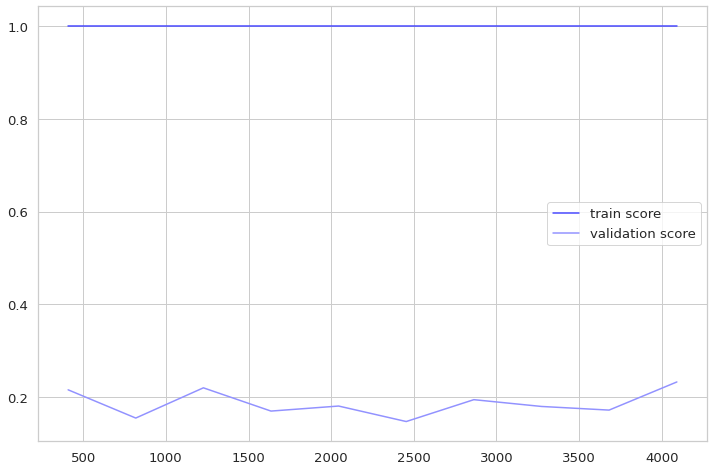

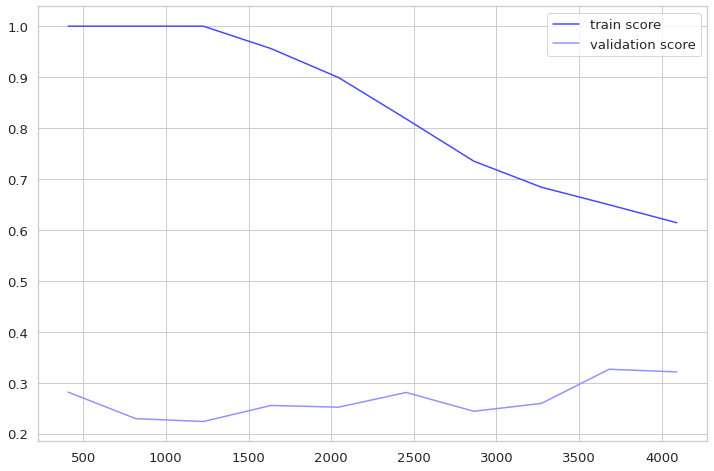

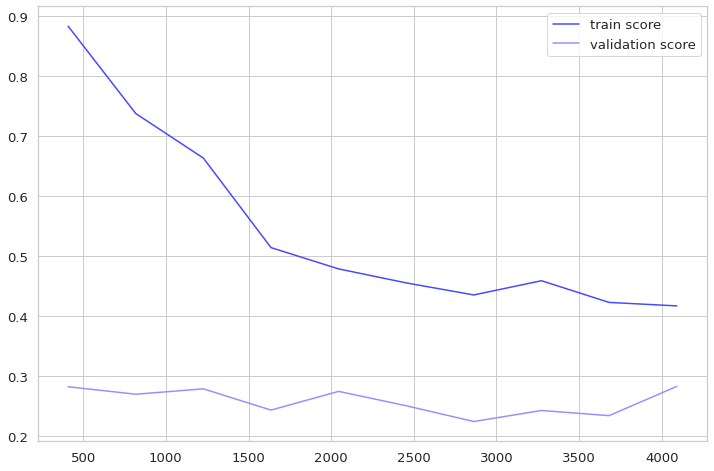

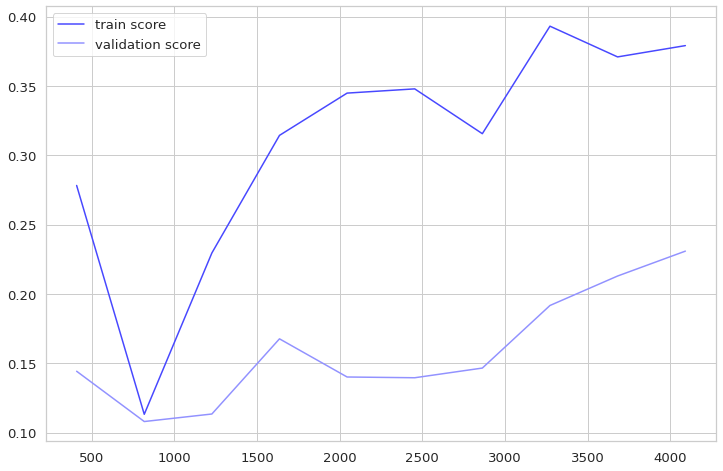

In [77]:
# Evaluate models
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)